In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage.io


In [2]:
DATA_PATH = '/Users/sowmyak/my_stuff/widsdatathon2019'
catalog = pd.read_csv(DATA_PATH + '/traininglabels.csv')

In [3]:
def get_num_from_index(index):
    """Get 9 digit number corresponding to input index"""
    str_index = str(index)
    assert len(str_index) < 9, "# digits must be less tahn 9"
    zeros_to_add = 9 - len(str_index)
    num = '0'*zeros_to_add + str_index
    return num

def load_training_image(index):
    """Returns RGB image corresonding to input index"""
    num = get_num_from_index(index)
    filename = DATA_PATH + f'/train_images/img_{num}.jpg'
    image = skimage.io.imread(filename)
    
def load_training_image(cat, index):
    """Returns RGB image corresonding to input index"""
    name = cat['image_id'][index]
    filename = DATA_PATH + '/train_images/' + name
    image = skimage.io.imread(filename)
    return image

def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

942 images contain palm plantations out of len(catalog)


<IPython.core.display.Javascript object>


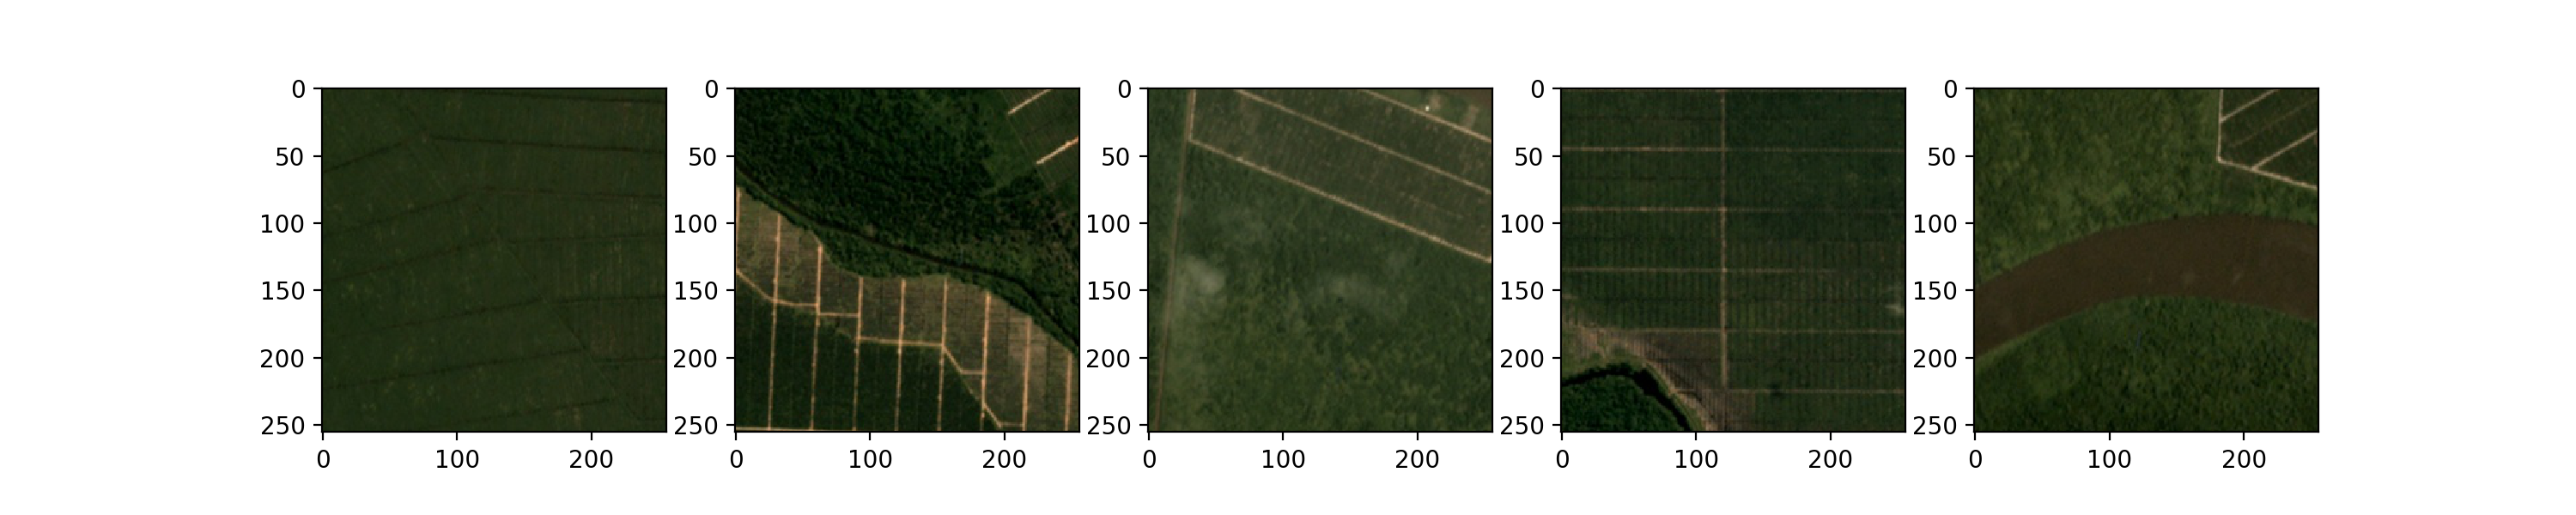

In [6]:
num=5
positive, = np.where(catalog['has_oilpalm'] == 1)
print(f"{len(positive)} images contain palm plantations out of len(catalog)")
picks = np.random.choice(positive, num)
_, ax = plt.subplots(1, num, figsize=(15, 3))
for i, p in enumerate(picks):
    im = load_training_image(catalog, p)
    ax[i].imshow(im)

<IPython.core.display.Javascript object>


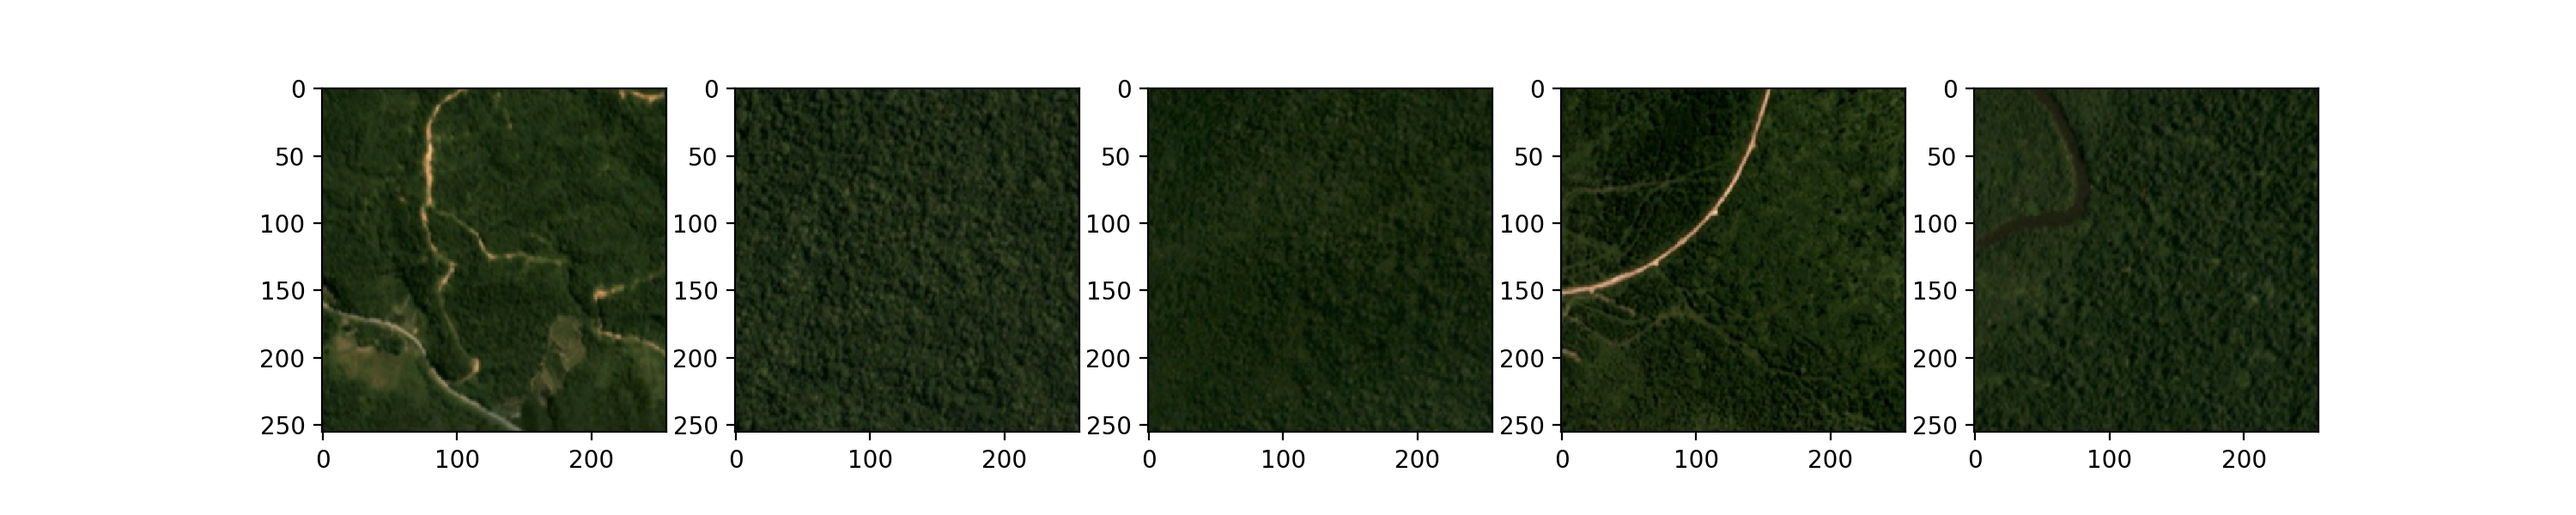

In [7]:
num=5
negative, = np.where(catalog['has_oilpalm'] == 0)
picks = np.random.choice(negative, num)
_, ax = plt.subplots(1, num, figsize=(15, 3))
for i, n in enumerate(picks):
    im = load_training_image(catalog, n)
    ax[i].imshow(im)

In [30]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [31]:
# Load image to pytorch
ptrch_im = torch.from_numpy(im.transpose(2,0, 1))

In [35]:
class PalmDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.catalog = pd.read_csv(DATA_PATH + '/traininglabels.csv')

    def __len__(self):
        return len(self.catalog)

    def __getitem__(self, idx):
        name = self.catalog['image_id'][idx]
        filename = DATA_PATH + '/train_images/' + name
        image = skimage.io.imread(filename)
        sample = {'image': np.transpose(image, axes=(2,0,1)), 'output': self.catalog["has_oilpalm"][idx]}
        return sample
    
dataset = PalmDataset()

In [36]:
dataloader = DataLoader(dataset, batch_size=4,
                        shuffle=True, num_workers=0)

In [43]:
a = 1 if True else 2

0 torch.Size([4, 3, 256, 256]) tensor([0, 0, 0, 0])
1 torch.Size([4, 3, 256, 256]) tensor([0, 1, 0, 0])
2 torch.Size([4, 3, 256, 256]) tensor([0, 0, 0, 0])
3 torch.Size([4, 3, 256, 256]) tensor([0, 0, 1, 0])


<IPython.core.display.Javascript object>


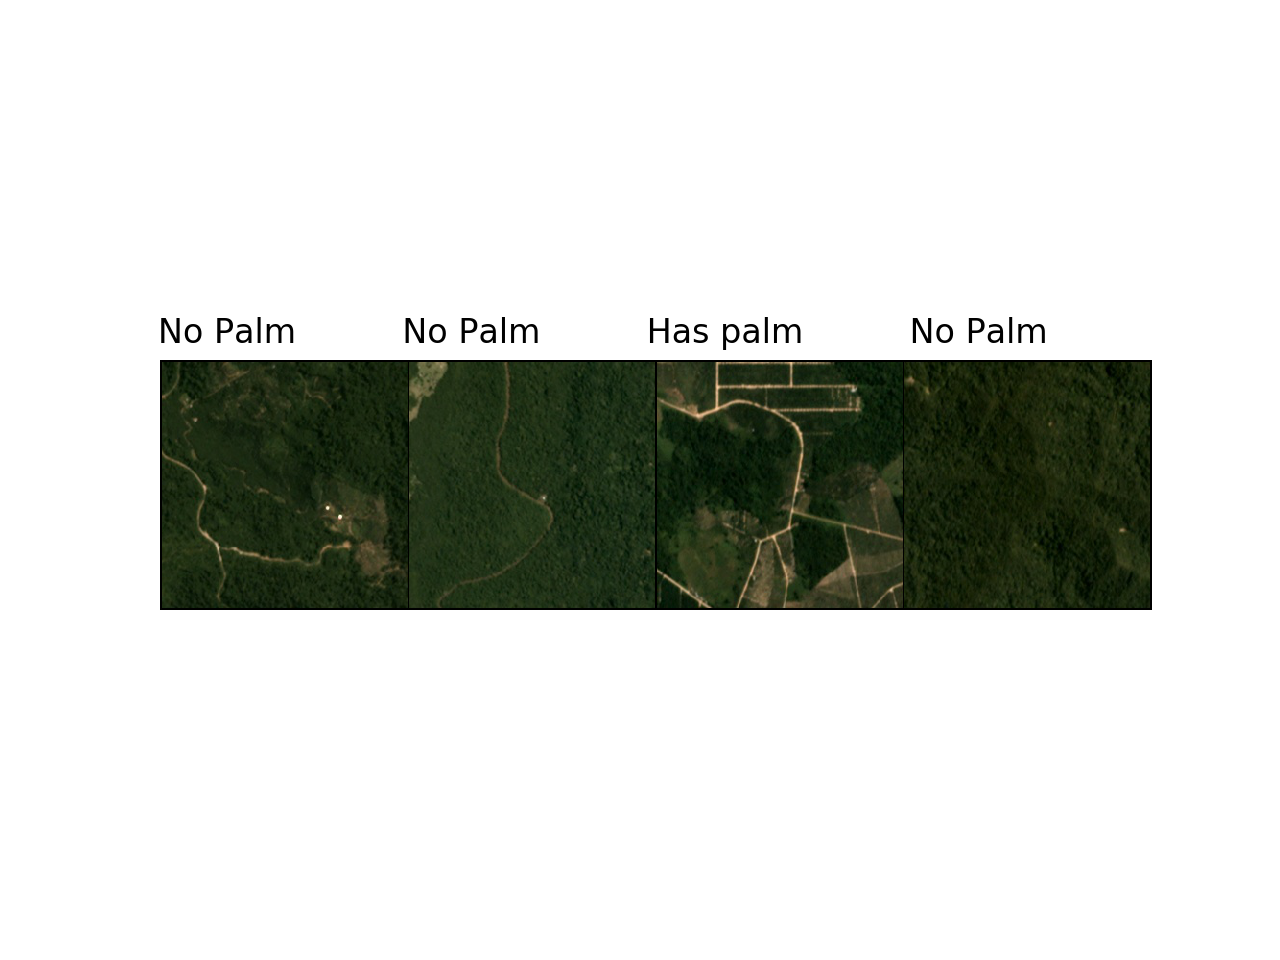

In [52]:
# Helper function to show a batch
def show_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch, ouput_batch = \
            sample_batched['image'], sample_batched['output']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))
    title = ''
    for i in range(batch_size):
        txt = 'Has palm' if ouput_batch[i] == 1 else 'No Palm'
        title += txt 
        title += '          '
    plt.title(title)
        

for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['output'])

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break

In [56]:
sample_batched['output'][1]

tensor(0)

In [60]:
sample_batched['image'].shape

torch.Size([4, 3, 256, 256])

In [67]:
tsfrm = transforms.RandomRotation(180)